### Building the dataset

In [73]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pickle
from statistics import mean

api_key='gwLz-7LdjQXwYLWfB7Sa'

In [30]:
dfsample = quandl.get('FMAC/HPI_AK',authtoken=api_key) #sample for getting data from quandl
dfsample.rename(columns = {'Value':'AK'}, inplace = True)
dfsample.head()
dfsample1 = quandl.get('FMAC/HPI_AZ',authtoken=api_key)
dfsample1.rename(columns = {'Value':'AZ'}, inplace = True)
mdf = dfsample.join(dfsample1)
#mdf = dfsample.merge(dfsample1,on='Date', how='outer')
#mdf.rename(columns = {'Value_x':'Value'}, inplace = True)
mdf.head()

,AK,AZ
Date,,
1975-01-31,34.371830,28.937735
1975-02-28,34.880945,29.463708
1975-03-31,35.402217,29.959514
1975-04-30,35.944703,30.345148
1975-05-31,36.535272,30.546449


##### Function for getting all states abbreviations from wikipedia

In [114]:
def state_list():
    fiddy_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return list(fiddy_states[0][1][1:])


##### Function for geting all states housing prices as well as pickling the data frame

In [32]:
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    
    for abbv in states:
        query = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns = {'Value':str(abbv)}, inplace=True)
        if main_df.empty:
            main_df = df
        else:
            #main_df = pd.concat(['main_df','df'], axis = 1)
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states.pickle','wb')#wb=write bytes
    pickle.dump(main_df,pickle_out)
    pickle_out.close()




##### Reading the datadrame from the pickle

In [2]:
HPI_data = pd.read_pickle('/home/psicktrick/Desktop/py/Data Analysis/fiddy_states.pickle')
HPI_data.head
len(HPI_data)
len(list(HPI_data))
len(list(range(516)))
HPI_data.head()
#HPI_data.iloc[0,1]

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.695975,34.371830,28.937735,36.738861,15.722312,19.603977,24.369431,27.264842,30.997043,30.720917,...,37.722210,32.179633,32.602350,24.698474,26.637620,27.912640,17.484315,41.002072,28.096764,31.668794
1975-02-28,35.896770,34.880945,29.463708,37.098962,15.775202,19.837138,24.908036,27.250734,32.229049,30.450593,...,37.319634,32.218599,32.944116,25.060977,26.956271,28.205810,17.571053,42.040473,28.486170,32.161920
1975-03-31,36.133518,35.402217,29.959514,37.416398,15.964942,20.073483,25.313556,27.268478,34.027506,30.338265,...,36.908861,32.296539,33.542975,25.381341,27.264731,28.420407,17.689717,43.122486,28.860737,32.680525
1975-04-30,36.425723,35.944703,30.345148,37.677813,16.275547,20.301864,25.541141,27.362673,36.218077,30.401314,...,36.498238,32.416385,34.402826,25.627200,27.546568,28.578762,17.818792,44.239196,29.185048,33.210124
1975-05-31,36.695708,36.535272,30.546449,37.921099,16.533017,20.495075,25.614056,27.561893,36.437855,30.511355,...,36.121328,32.563209,34.649755,25.782334,27.794738,28.717611,17.933277,45.363222,29.443523,33.714128


In [103]:
HPI_data.iloc[:,0].apply(lambda x: ((x - HPI_data.iloc[0,0])/HPI_data.iloc[0,0]) *100).head()

Date
1975-01-31    0.000000
1975-02-28    0.562515
1975-03-31    1.225749
1975-04-30    2.044344
1975-05-31    2.800690
Name: AL, dtype: float64

##### Function for calculating percent change from the first value

In [3]:
def percent_change(HPI_data):
    for i in range(len(list(HPI_data))):
        HPI_data.iloc[:,i] = HPI_data.iloc[:,i].apply(lambda x: ((x - HPI_data.iloc[0,i])/HPI_data.iloc[0,i]) *100)
    return HPI_data

HPI_data = percent_change(HPI_data)
HPI_data.head()

## Writing function for pickling

In [27]:
def pickle_it(file_to_be_pickled,pickle_name):
    pickle_out = open(str(pickle_name),'wb')#wb=write bytes
    pickle.dump(file_to_be_pickled,pickle_out)
    pickle_out.close()


##### Pickling percent change HPI data


In [32]:
pickle_it(HPI_data,"fiddy_states_perc_change")

In [34]:
df = pd.read_pickle("fiddy_states_perc_change")
df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.562515,1.481200,1.817604,0.980164,0.336400,1.189358,2.210168,-0.051745,3.974592,-0.879933,...,-1.067211,0.121091,1.048285,1.467712,1.196247,1.050315,0.496091,2.532556,1.385947,1.557138
1975-03-31,1.225749,2.997765,3.530959,1.844199,1.543223,2.394954,3.874219,0.013333,9.776619,-1.245574,...,-2.156154,0.363292,2.885144,2.764815,2.354232,1.819130,1.174779,5.171480,2.719078,3.194727
1975-04-30,2.044344,4.576052,4.863591,2.555748,3.518790,3.559925,4.808115,0.358817,16.843650,-1.040342,...,-3.244698,0.735722,5.522535,3.760255,3.412273,2.386455,1.913011,7.895025,3.873343,4.867033
1975-05-31,2.800690,6.294231,5.559227,3.217949,5.156398,4.545496,5.107319,1.089500,17.552679,-0.682149,...,-4.243870,1.191986,6.279930,4.388367,4.343927,2.883894,2.567797,10.636412,4.793289,6.458518


##### Plotting the data

No handles with labels found to put in legend.


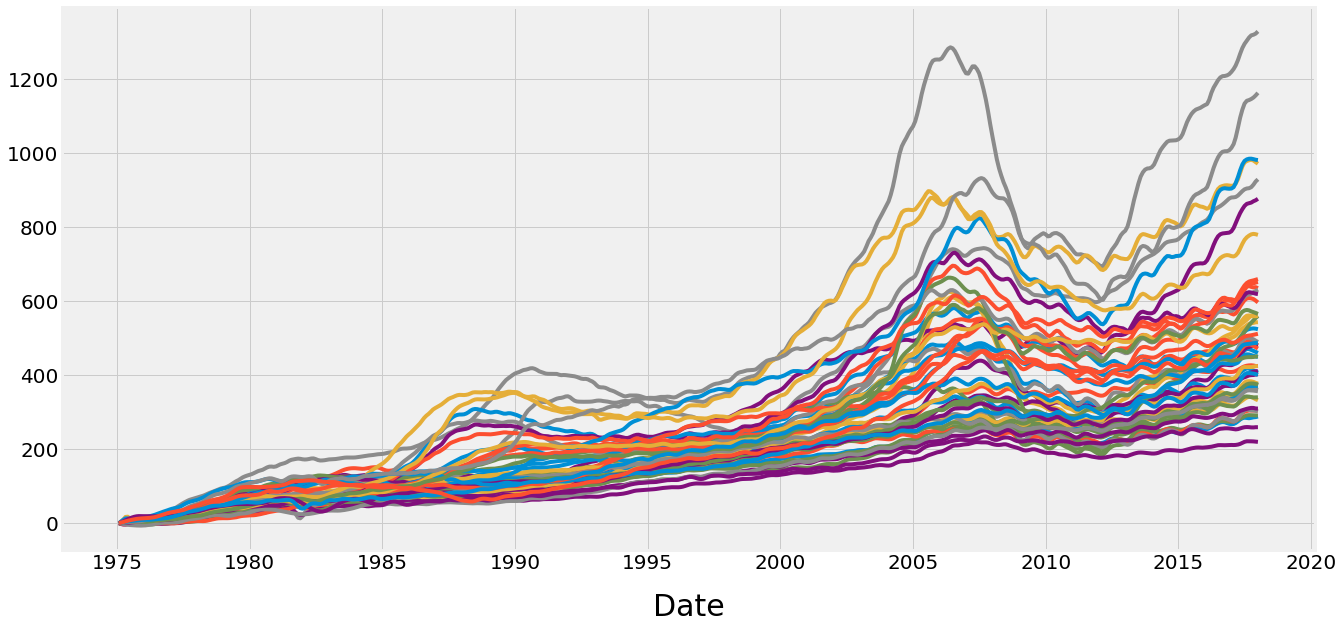

In [5]:
plt.figure(figsize=(20,10))
plt.plot(HPI_data) #need to use plt.plot if you wnat to adjust figure size
plt.legend().remove()
plt.xlabel('Date', fontsize=30, labelpad = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

##### Adding the United States housing data as Benchmark data


In [5]:
def HPI_Benchmark():
    df=quandl.get("FMAC/HPI_USA",AUTHTOKEN=api_key)
    df.rename(columns={"Value":"United States"},inplace=True)
    df["United States"]=(df["United States"]-df["United States"][0])/df["United States"][0] *100.0
    return df

In [6]:
benchmark = HPI_Benchmark()
benchmark.head()

,United States
Date,
1975-01-31,0.000000
1975-02-28,0.643926
1975-03-31,1.693014
1975-04-30,3.059974
1975-05-31,3.912826


No handles with labels found to put in legend.


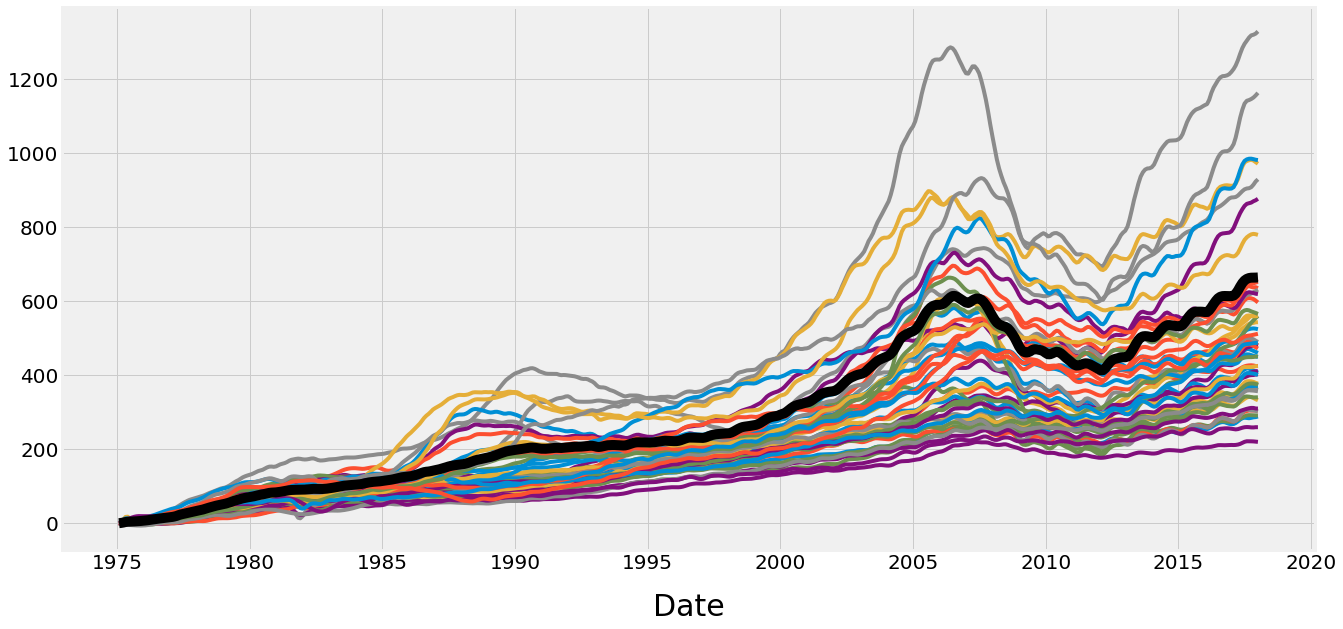

In [8]:
fig, axarr = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(HPI_data) 
plt.plot(benchmark, color='k', linewidth=10)

plt.legend().remove()
plt.xlabel('Date', fontsize=30, labelpad = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

##### Correlation table

In [9]:
HPI_State_Correlation = HPI_data.corr()
HPI_State_Correlation.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
AL,1.000000,0.950610,0.941353,0.995365,0.944611,0.956365,0.951143,0.983180,0.933786,0.978893,...,0.975571,0.991344,0.933283,0.976017,0.980493,0.977369,0.978803,0.983559,0.991898,0.950879
AK,0.950610,1.000000,0.918549,0.970727,0.928878,0.957982,0.882907,0.939222,0.910402,0.910016,...,0.976841,0.961976,0.973953,0.965930,0.958821,0.964951,0.960210,0.974658,0.936055,0.988386
AZ,0.941353,0.918549,1.000000,0.940941,0.978999,0.924302,0.912054,0.948140,0.994902,0.954176,...,0.916572,0.938985,0.904185,0.942103,0.929185,0.960985,0.959374,0.926003,0.939341,0.918020
AR,0.995365,0.970727,0.940941,1.000000,0.948633,0.968791,0.941536,0.977601,0.933325,0.970564,...,0.986254,0.993542,0.954645,0.980740,0.982971,0.981478,0.979703,0.991477,0.987227,0.967230
CA,0.944611,0.928878,0.978999,0.948633,1.000000,0.943838,0.931867,0.963471,0.987448,0.956576,...,0.938523,0.951755,0.925386,0.936776,0.957197,0.979141,0.968355,0.941005,0.946806,0.927068


In [142]:
HPI_State_Correlation.loc['AL','AK']

0.9506098343066778

In [10]:
HPI_State_Correlation.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.969991,0.943373,0.937553,0.972036,0.949229,0.950724,0.926624,0.961880,0.934780,0.956292,...,0.961394,0.970763,0.932500,0.957874,0.963450,0.967426,0.966459,0.964914,0.965543,0.942940
std,0.025274,0.039552,0.025360,0.025128,0.022249,0.030373,0.041004,0.028662,0.028335,0.024734,...,0.033909,0.025022,0.040287,0.031079,0.029375,0.025038,0.023427,0.030770,0.025057,0.041471
min,0.882021,0.789730,0.862478,0.872360,0.879030,0.850228,0.814481,0.872770,0.852304,0.866715,...,0.827538,0.869478,0.807780,0.861735,0.850858,0.857898,0.877117,0.843745,0.887492,0.786434
25%,0.956579,0.931467,0.924449,0.967509,0.937869,0.936448,0.899831,0.951011,0.918622,0.947554,...,0.950505,0.960841,0.916007,0.944165,0.957592,0.961654,0.959105,0.955688,0.957423,0.926764
50%,0.977651,0.953094,0.939571,0.979016,0.948102,0.957346,0.930490,0.966621,0.933555,0.958870,...,0.972498,0.977039,0.937210,0.965548,0.971401,0.973892,0.972712,0.975842,0.970498,0.954474
75%,0.985823,0.964784,0.947962,0.989650,0.963391,0.971992,0.957771,0.980288,0.951685,0.973170,...,0.982684,0.987861,0.960878,0.980720,0.980462,0.979199,0.979112,0.983817,0.985101,0.966719
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Resampling

In [11]:
TX1yr = HPI_data['TX'].resample('A').mean()
TX1yr.head()

Date
1975-12-31     4.039782
1976-12-31    11.367589
1977-12-31    22.555985
1978-12-31    40.746679
1979-12-31    63.361461
Freq: A-DEC, Name: TX, dtype: float64

Ploting actual texas HPI with anual resampled data


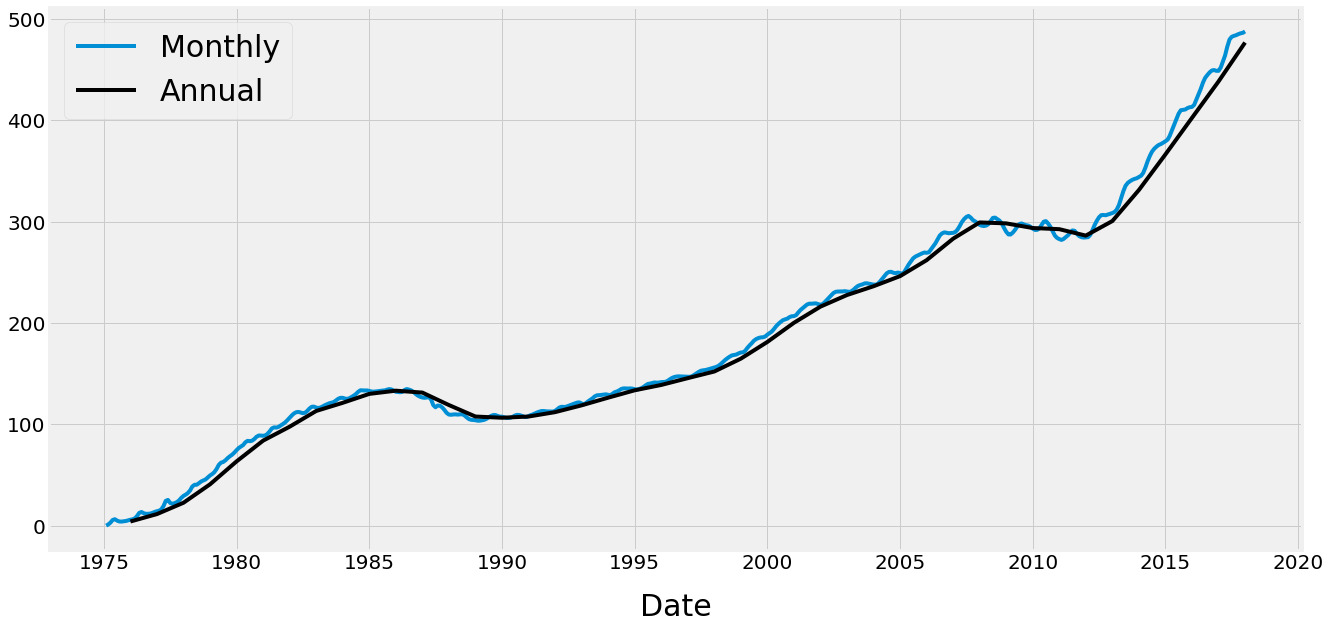

In [12]:
plt.figure(figsize=(20,10))
plt.plot(HPI_data['TX'],label="Monthly")
plt.plot(TX1yr, color='k',label="Annual")
plt.legend(prop={'size': 30})  #setting legend size
plt.xlabel('Date', fontsize=30, labelpad = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Rolling statistics


In [13]:
HPI_data1 = HPI_data.copy()
HPI_data1['TX12MA'] = HPI_data1['TX'].rolling(12).mean()
HPI_data1['TX12MA'].tail()

Date
2017-08-31    464.359626
2017-09-30    467.351237
2017-10-31    470.372923
2017-11-30    473.497187
2017-12-31    476.740047
Name: TX12MA, dtype: float64

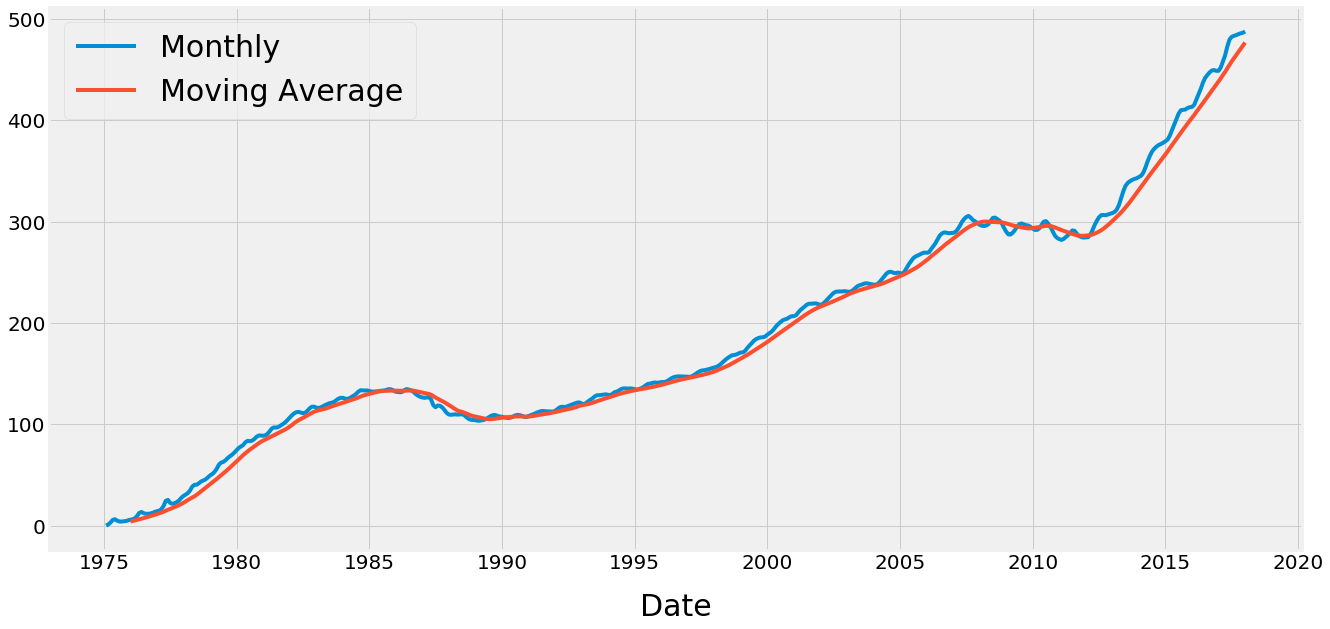

In [14]:
plt.figure(figsize=(20,10))
plt.plot(HPI_data['TX'], label="Monthly")
plt.plot(HPI_data1['TX12MA'], label="Moving Average")
plt.legend(prop={'size': 30})  #setting legend size
plt.xlabel('Date', fontsize=30, labelpad = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

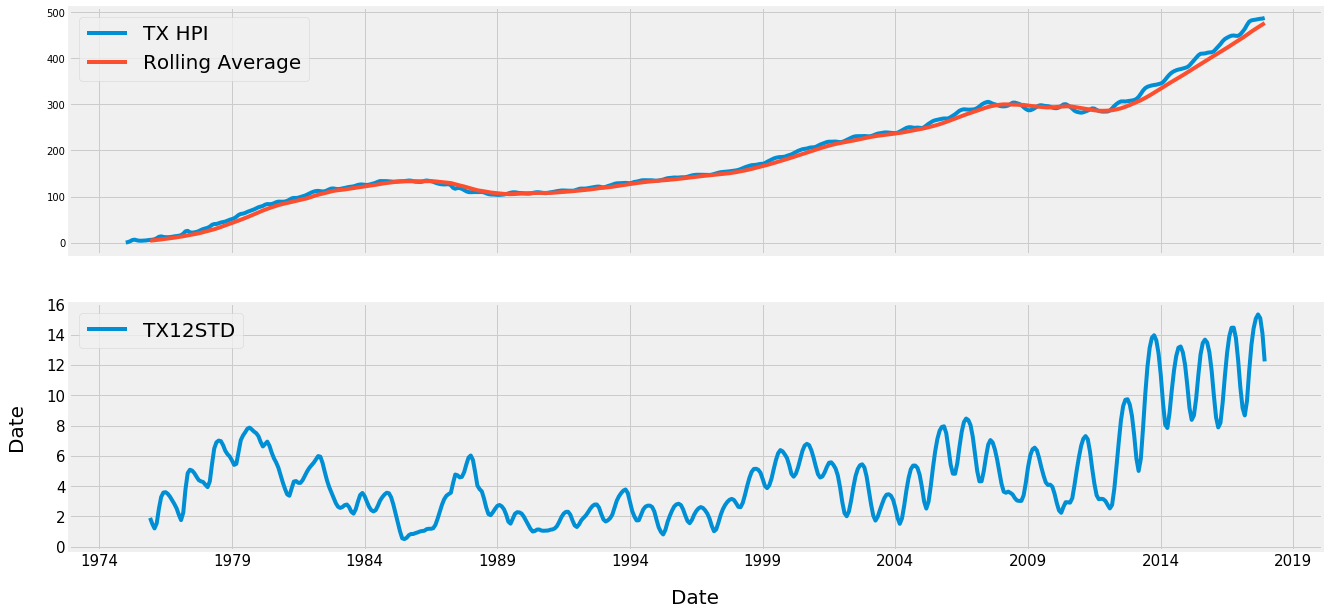

In [19]:
#fig, axarr = plt.subplots(2, 1, figsize=(20, 10))

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((2,1), (0,0))

ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


HPI_data1['TX12MA'] = HPI_data1['TX'].rolling(12).mean()
HPI_data1['TX12STD'] = HPI_data1['TX'].rolling(12).std()

HPI_data1['TX'].plot(ax=ax1, label="TX HPI")
HPI_data1['TX12MA'].plot(ax=ax1, label="Rolling Average")
plt.yticks(fontsize = 15)
HPI_data1['TX12STD'].plot(ax=ax2)

ax1.legend(prop={'size': 20})
ax2.legend(prop={'size': 20})

plt.xlabel('Date', fontsize=20, labelpad = 20)
plt.ylabel('Date', fontsize=20, labelpad = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()



  #setting legend size
# plt.xlabel('Date', fontsize=10, labelpad = 20)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)




##### Joining 30 year mortgage data


In [25]:
def mortgage_30y():
    df= quandl.get("FMAC/MORTG",trim_start='1975-01-01', authtoken=api_key)
    df['Value']=(df['Value']-df['Value'][0]) / df["Value"][0] * 100.0
    #df=df.resample('1D').mean()#works without this
    df.columns=['M30']
    return df
mortgage_30y().head()

,M30
Date,
1975-01-01,0.000000
1975-02-01,-3.393425
1975-03-01,-5.620361
1975-04-01,-6.468717
1975-05-01,-5.514316


In [3]:
def mortgage_30y():
    df= quandl.get("FMAC/MORTG",trim_start='1975-01-01', authtoken=api_key)
    df['Value']=(df['Value']-df['Value'][0]) / df["Value"][0] * 100.0
    #df=df.resample('1D').mean()#works without this
    df=df.resample('m').mean()
    df.columns=['M30']
    return df
mortgage_30y().head()

,M30
Date,
1975-01-31,0.000000
1975-02-28,-3.393425
1975-03-31,-5.620361
1975-04-30,-6.468717
1975-05-31,-5.514316


##### Joining with the rest of the data


In [16]:
HPI_data = pd.read_pickle('fiddy_states_perc_change')
m30 = mortgage_30y()
HPI_Bench = HPI_Benchmark()
#m30.columns=['M30']
HPI = HPI_Bench.join(m30)
print(HPI.head())

            United States       M30
Date                               
1975-01-31       0.000000  0.000000
1975-02-28       0.643926 -3.393425
1975-03-31       1.693014 -5.620361
1975-04-30       3.059974 -6.468717
1975-05-31       3.912826 -5.514316


In [39]:
HPI.corr()

,United States,M30
United States,1.000000,-0.778378
M30,-0.778378,1.000000


In [8]:
state_HPI_M30 = HPI_data.join(m30)
state_HPI_M30.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,M30
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.562515,1.481200,1.817604,0.980164,0.336400,1.189358,2.210168,-0.051745,3.974592,-0.879933,...,0.121091,1.048285,1.467712,1.196247,1.050315,0.496091,2.532556,1.385947,1.557138,-3.393425
1975-03-31,1.225749,2.997765,3.530959,1.844199,1.543223,2.394954,3.874219,0.013333,9.776619,-1.245574,...,0.363292,2.885144,2.764815,2.354232,1.819130,1.174779,5.171480,2.719078,3.194727,-5.620361
1975-04-30,2.044344,4.576052,4.863591,2.555748,3.518790,3.559925,4.808115,0.358817,16.843650,-1.040342,...,0.735722,5.522535,3.760255,3.412273,2.386455,1.913011,7.895025,3.873343,4.867033,-6.468717
1975-05-31,2.800690,6.294231,5.559227,3.217949,5.156398,4.545496,5.107319,1.089500,17.552679,-0.682149,...,1.191986,6.279930,4.388367,4.343927,2.883894,2.567797,10.636412,4.793289,6.458518,-5.514316


In [44]:
state_HPI_M30.corr().head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,M30
AL,1.000000,0.950610,0.941353,0.995365,0.944611,0.956365,0.951143,0.983180,0.933786,0.978893,...,0.991344,0.933283,0.976017,0.980493,0.977369,0.978803,0.983559,0.991898,0.950879,-0.797161
AK,0.950610,1.000000,0.918549,0.970727,0.928878,0.957982,0.882907,0.939222,0.910402,0.910016,...,0.961976,0.973953,0.965930,0.958821,0.964951,0.960210,0.974658,0.936055,0.988386,-0.735017
AZ,0.941353,0.918549,1.000000,0.940941,0.978999,0.924302,0.912054,0.948140,0.994902,0.954176,...,0.938985,0.904185,0.942103,0.929185,0.960985,0.959374,0.926003,0.939341,0.918020,-0.673671
AR,0.995365,0.970727,0.940941,1.000000,0.948633,0.968791,0.941536,0.977601,0.933325,0.970564,...,0.993542,0.954645,0.980740,0.982971,0.981478,0.979703,0.991477,0.987227,0.967230,-0.788919
CA,0.944611,0.928878,0.978999,0.948633,1.000000,0.943838,0.931867,0.963471,0.987448,0.956576,...,0.951755,0.925386,0.936776,0.957197,0.979141,0.968355,0.941005,0.946806,0.927068,-0.733454


In [9]:
state_HPI_M30.corr()['M30'].head()

AL   -0.797161
AK   -0.735017
AZ   -0.673671
AR   -0.788919
CA   -0.733454
Name: M30, dtype: float64

In [43]:
state_HPI_M30.corr()['M30'].describe()

count    51.000000
mean     -0.738578
std       0.251963
min      -0.826219
25%      -0.799465
50%      -0.787298
75%      -0.757137
max       1.000000
Name: M30, dtype: float64

##### Getting fortune 500 data

In [54]:
def sp500_data():#video link:https://www.youtube.com/watch?v=r0s4slGHwzE
    df = pd.read_csv("sp500.csv",parse_dates=['Date'])#parse_dates converts string to DateTime
    df = df.iloc[1:,:]
    df.set_index('Date',inplace=True)
    df['Adj Close'] = (df['Adj Close']-df['Adj Close'][0]) / df["Adj Close"][0] * 100.0
    #df.index=pd.to_datetime(df.index)
    df = df.resample('M').mean()
    df.rename(columns={'Adj Close':'sp500'},inplace=True)
    #print(type(df['Date'][0]))#checking datatype of raw data,so we use parse_dates if this returns string instead of DateTimeIndex
##    print(df.index)
##    print(df['sp500'][1:].head())
##    print(df.loc['1975-01-31'])#accesing rows using date
    df=df['sp500']
    return df
sp500_data().head()

Date
1975-01-31     3.323491
1975-02-28    14.049322
1975-03-31    19.367785
1975-04-30    20.636734
1975-05-31    28.287322
Freq: M, Name: sp500, dtype: float64

##### Getting gdp_data

In [57]:
def gdp_data():
    df=quandl.get('BCB/4385',authtoken=api_key)
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    df=df.resample('M').mean()
    df.rename(columns={'Value':'GDP'},inplace='True')
    df=df['GDP']
    return df
gdp_data().head()

Date
1990-01-31     0.000000
1990-02-28    -2.697505
1990-03-31    -2.065278
1990-04-30   -10.874318
1990-05-31     1.006296
Freq: M, Name: GDP, dtype: float64

##### Getting unemployment data

In [62]:
def us_unemployment():
    df=quandl.get('FRED/SLUEM1524ZSUSA',trim_start='1975-01-01',authtoken=api_key)
    df.rename(columns={'Value':'Unemloyment Rate'},inplace='True')
    #df['Unemloyment Rate']=(df['Unemloyment Rate']-df['Unemloyment Rate'][0]) / df["Unemloyment Rate"][0] * 100.0
    df=df.resample('1D').mean()
    df=df.resample('M').mean()
    #print(df)
    return df
us_unemployment().head()

,Unemloyment Rate
Date,
1991-01-31,13.348
1991-02-28,NaN
1991-03-31,NaN
1991-04-30,NaN
1991-05-31,NaN


##### Creating the final dataset

In [37]:
HPI_data = pd.read_pickle("fiddy_states_perc_change")
m30 =  mortgage_30y()
sp500 = sp500_data()
gdp = gdp_data()
HPI_Bench = HPI_Benchmark()
unemployment = us_unemployment()
HPI_eco_indicators = HPI_Bench.join([m30,sp500,gdp,unemployment])
HPI_eco_indicators.head()

,United States,M30,sp500,GDP,Unemloyment Rate
Date,,,,,
1975-01-31,0.000000,0.000000,5.840276,NaN,NaN
1975-02-28,0.643926,-3.393425,16.827369,NaN,NaN
1975-03-31,1.693014,-5.620361,22.275382,NaN,NaN
1975-04-30,3.059974,-6.468717,23.575240,NaN,NaN
1975-05-31,3.912826,-5.514316,31.412184,NaN,NaN


##### Pickling economic indicators

In [28]:
pickle_it(HPI_eco_indicators,"HPI_eco_indicators")

In [29]:
HPI_eco_indicators = pd.read_pickle('HPI_eco_indicators')
HPI_eco_indicators.head()

,United States,M30,sp500,GDP,Unemloyment Rate
Date,,,,,
1975-01-31,0.000000,0.000000,5.840276,NaN,NaN
1975-02-28,0.643926,-3.393425,16.827369,NaN,NaN
1975-03-31,1.693014,-5.620361,22.275382,NaN,NaN
1975-04-30,3.059974,-6.468717,23.575240,NaN,NaN
1975-05-31,3.912826,-5.514316,31.412184,NaN,NaN


In [30]:
HPI_eco_indicators.corr()

,United States,M30,sp500,GDP,Unemloyment Rate
United States,1.000000,-0.778378,0.901273,0.634235,-0.000335
M30,-0.778378,1.000000,-0.795957,-0.821402,-0.355416
sp500,0.901273,-0.795957,1.000000,0.649273,-0.089715
GDP,0.634235,-0.821402,0.649273,1.000000,0.481277
Unemloyment Rate,-0.000335,-0.355416,-0.089715,0.481277,1.000000


In [31]:
HPI_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.562515,1.481200,1.817604,0.980164,0.336400,1.189358,2.210168,-0.051745,3.974592,-0.879933,...,-1.067211,0.121091,1.048285,1.467712,1.196247,1.050315,0.496091,2.532556,1.385947,1.557138
1975-03-31,1.225749,2.997765,3.530959,1.844199,1.543223,2.394954,3.874219,0.013333,9.776619,-1.245574,...,-2.156154,0.363292,2.885144,2.764815,2.354232,1.819130,1.174779,5.171480,2.719078,3.194727
1975-04-30,2.044344,4.576052,4.863591,2.555748,3.518790,3.559925,4.808115,0.358817,16.843650,-1.040342,...,-3.244698,0.735722,5.522535,3.760255,3.412273,2.386455,1.913011,7.895025,3.873343,4.867033
1975-05-31,2.800690,6.294231,5.559227,3.217949,5.156398,4.545496,5.107319,1.089500,17.552679,-0.682149,...,-4.243870,1.191986,6.279930,4.388367,4.343927,2.883894,2.567797,10.636412,4.793289,6.458518


### Mapping functions and rolling apply

In [65]:
housing_data = pd.read_pickle('HPI.pickle')
housing_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VT,VA,WA,WV,WI,WY,United States,M30,sp500,GDP
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,94.974974,63.139000,125.443669,89.908547,406.238059,128.858156,291.478118,201.101980,132.982572,117.244635,...,217.704030,179.700877,225.181052,70.097255,103.228800,75.277548,198.511465,4.984093,395.874896,37961.0
1990-02-28,94.864718,64.900070,125.496292,90.256339,407.959698,129.051003,289.127060,202.433417,132.462249,116.762984,...,218.055497,179.410438,233.931086,70.457008,104.565789,75.966030,199.148118,8.165429,381.990439,36937.0
1990-03-31,95.142798,68.958036,125.201273,90.765835,410.952793,129.232563,286.307604,202.749924,132.332498,116.037148,...,218.723988,179.594242,242.455064,71.021009,106.197218,76.922197,200.043368,8.907741,393.677086,37177.0
1990-04-30,95.789335,75.627434,125.036909,91.220011,413.396790,129.368240,283.067735,202.720480,132.758847,115.848855,...,219.192610,180.593263,250.683031,71.820097,107.800236,78.335534,201.122007,9.968187,393.258472,33833.0
1990-05-31,96.519256,84.354104,125.334855,91.670212,414.423966,130.045961,279.991894,202.839366,133.305893,116.203807,...,219.077235,181.633429,257.999363,72.888749,108.982580,80.244768,202.184950,11.134677,410.866411,38343.0


In [66]:
housing_data = housing_data.pct_change()
housing_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VT,VA,WA,WV,WI,WY,United States,M30,sp500,GDP
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,-0.001161,0.027892,0.000419,0.003868,0.004238,0.001497,-0.008066,0.006621,-0.003913,-0.004108,...,0.001614,-0.001616,0.038858,0.005132,0.012952,0.009146,0.003207,0.638298,-0.035073,-0.026975
1990-03-31,0.002931,0.062526,-0.002351,0.005645,0.007337,0.001407,-0.009752,0.001564,-0.000980,-0.006216,...,0.003066,0.001024,0.036438,0.008005,0.015602,0.012587,0.004495,0.090909,0.030594,0.006498
1990-04-30,0.006795,0.096717,-0.001313,0.005004,0.005947,0.001050,-0.011316,-0.000145,0.003222,-0.001623,...,0.002143,0.005563,0.033936,0.011251,0.015095,0.018374,0.005392,0.119048,-0.001063,-0.089948
1990-05-31,0.007620,0.115390,0.002383,0.004935,0.002485,0.005239,-0.010866,0.000586,0.004121,0.003064,...,-0.000526,0.005760,0.029186,0.014880,0.010968,0.024373,0.005285,0.117021,0.044774,0.133302


In [70]:
def create_labels(cur_hpi, fut_hpi):
    if fut_hpi > cur_hpi:
        return 1
    else:
        return 0

In [69]:
housing_data.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_data.dropna(inplace = True)

housing_data.head()

housing_data['US_HPI_future'] = housing_data['United States'].shift(-1)

housing_data[['United States', 'US_HPI_future']].head()

housing_data.dropna(inplace=True)


In [72]:
housing_data['label'] = list(map(create_labels,housing_data['United States'], housing_data['US_HPI_future']))
housing_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,WA,WV,WI,WY,United States,M30,sp500,GDP,US_HPI_future,label
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-28,-0.001161,0.027892,0.000419,0.003868,0.004238,0.001497,-0.008066,0.006621,-0.003913,-0.004108,...,0.038858,0.005132,0.012952,0.009146,0.003207,0.638298,-0.035073,-0.026975,0.004495,1
1990-03-31,0.002931,0.062526,-0.002351,0.005645,0.007337,0.001407,-0.009752,0.001564,-0.000980,-0.006216,...,0.036438,0.008005,0.015602,0.012587,0.004495,0.090909,0.030594,0.006498,0.005392,1
1990-04-30,0.006795,0.096717,-0.001313,0.005004,0.005947,0.001050,-0.011316,-0.000145,0.003222,-0.001623,...,0.033936,0.011251,0.015095,0.018374,0.005392,0.119048,-0.001063,-0.089948,0.005285,0
1990-05-31,0.007620,0.115390,0.002383,0.004935,0.002485,0.005239,-0.010866,0.000586,0.004121,0.003064,...,0.029186,0.014880,0.010968,0.024373,0.005285,0.117021,0.044774,0.133302,0.005122,0
1990-06-30,0.004427,0.104417,0.004148,0.005152,0.003686,0.007055,-0.006861,-0.000050,0.003062,0.002863,...,0.017984,0.015368,0.010018,0.024724,0.005122,-0.304762,0.035985,0.031036,0.003759,0


In [74]:
def moving_average(values):
    ma = mean(values)
    return ma

In [80]:
housing_data['ma_apply_example']=housing_data['M30'].rolling(window=10).apply(moving_average,raw=False)

In [81]:
housing_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,WV,WI,WY,United States,M30,sp500,GDP,US_HPI_future,label,ma_apply_example
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-28,-0.001161,0.027892,0.000419,0.003868,0.004238,0.001497,-0.008066,0.006621,-0.003913,-0.004108,...,0.005132,0.012952,0.009146,0.003207,0.638298,-0.035073,-0.026975,0.004495,1,NaN
1990-03-31,0.002931,0.062526,-0.002351,0.005645,0.007337,0.001407,-0.009752,0.001564,-0.000980,-0.006216,...,0.008005,0.015602,0.012587,0.004495,0.090909,0.030594,0.006498,0.005392,1,NaN
1990-04-30,0.006795,0.096717,-0.001313,0.005004,0.005947,0.001050,-0.011316,-0.000145,0.003222,-0.001623,...,0.011251,0.015095,0.018374,0.005392,0.119048,-0.001063,-0.089948,0.005285,0,NaN
1990-05-31,0.007620,0.115390,0.002383,0.004935,0.002485,0.005239,-0.010866,0.000586,0.004121,0.003064,...,0.014880,0.010968,0.024373,0.005285,0.117021,0.044774,0.133302,0.005122,0,NaN
1990-06-30,0.004427,0.104417,0.004148,0.005152,0.003686,0.007055,-0.006861,-0.000050,0.003062,0.002863,...,0.015368,0.010018,0.024724,0.005122,-0.304762,0.035985,0.031036,0.003759,0,NaN


In [91]:
housing_data = housing_data.drop('ma_apply_example', axis = 1)
housing_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,WA,WV,WI,WY,United States,M30,sp500,GDP,US_HPI_future,label
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-28,-0.001161,0.027892,0.000419,0.003868,0.004238,0.001497,-0.008066,0.006621,-0.003913,-0.004108,...,0.038858,0.005132,0.012952,0.009146,0.003207,0.638298,-0.035073,-0.026975,0.004495,1
1990-03-31,0.002931,0.062526,-0.002351,0.005645,0.007337,0.001407,-0.009752,0.001564,-0.000980,-0.006216,...,0.036438,0.008005,0.015602,0.012587,0.004495,0.090909,0.030594,0.006498,0.005392,1
1990-04-30,0.006795,0.096717,-0.001313,0.005004,0.005947,0.001050,-0.011316,-0.000145,0.003222,-0.001623,...,0.033936,0.011251,0.015095,0.018374,0.005392,0.119048,-0.001063,-0.089948,0.005285,0
1990-05-31,0.007620,0.115390,0.002383,0.004935,0.002485,0.005239,-0.010866,0.000586,0.004121,0.003064,...,0.029186,0.014880,0.010968,0.024373,0.005285,0.117021,0.044774,0.133302,0.005122,0
1990-06-30,0.004427,0.104417,0.004148,0.005152,0.003686,0.007055,-0.006861,-0.000050,0.003062,0.002863,...,0.017984,0.015368,0.010018,0.024724,0.005122,-0.304762,0.035985,0.031036,0.003759,0


In [85]:
from sklearn import svm, preprocessing, cross_validation

/home/psicktrick/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [92]:
x=np.array(housing_data.drop(['label','US_HPI_future'],1))#features#1 is for the drop?
x=preprocessing.scale(x)

In [93]:
y=np.array(housing_data['label'])

In [105]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)


clf.score(x_test,y_test)

0.7258064516129032